<img src="../imgs/bannerImageClassification.jpeg" style="width:1700px;heigth:100px">



# <center> 02. Introduction on Image classification! </center>


## <span style="color:red"> Outline </span> 
1. **Images classification and recognition**
2. **Image similarity:Content-based image retrieval**
3. **KNN simple classification**

In [3]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## <span style="color:red"> 1. Images classification and recognition </span> 

The classification is the problem of predicting a discrete class label output for an example.

**Function Approximation:** The idea is  developing a model using historical data to make a prediction on new data where we do not have the answer. This is done by approximating a function:    

$$\hat{f}: x(t) \to y(t)$$

$x(t) = \left \{ x_1, x_2, \ldots x_n  \right \}$ is input data, while $y(t) = \left \{0,1 \right \}$ is output data. For classification, $y(t)$ are discrete output variables.


<img src="../imgs/PipelineImage.jpg" style="width:800px;">

Charge the 10_small_dataset


#### Looks simple ...and we have many features: shape, color, geometry, among others!

In [4]:
path_classes = '../data/image_set/'
classes_names = os.listdir(path_classes)
print classes_names
dic_imgs ={}

for i, name_class in enumerate(classes_names):
    dic_imgs[classes_names[i]]=np.array(os.listdir(path_classes + classes_names[i]))
    print "class: ", name_class, " total samples: ", len(dic_imgs[classes_names[i]])

['cougar_body', 'chair', 'car_side', 'elephant', 'accordion', 'garfield', 'electric_guitar', 'brain', 'gerenuk', 'butterfly']
class:  cougar_body  total samples:  47
class:  chair  total samples:  62
class:  car_side  total samples:  123
class:  elephant  total samples:  64
class:  accordion  total samples:  55
class:  garfield  total samples:  34
class:  electric_guitar  total samples:  75
class:  brain  total samples:  98
class:  gerenuk  total samples:  34
class:  butterfly  total samples:  91


### Visualize
Now we going to select and visualize  random image subsets to dimension the problem! 

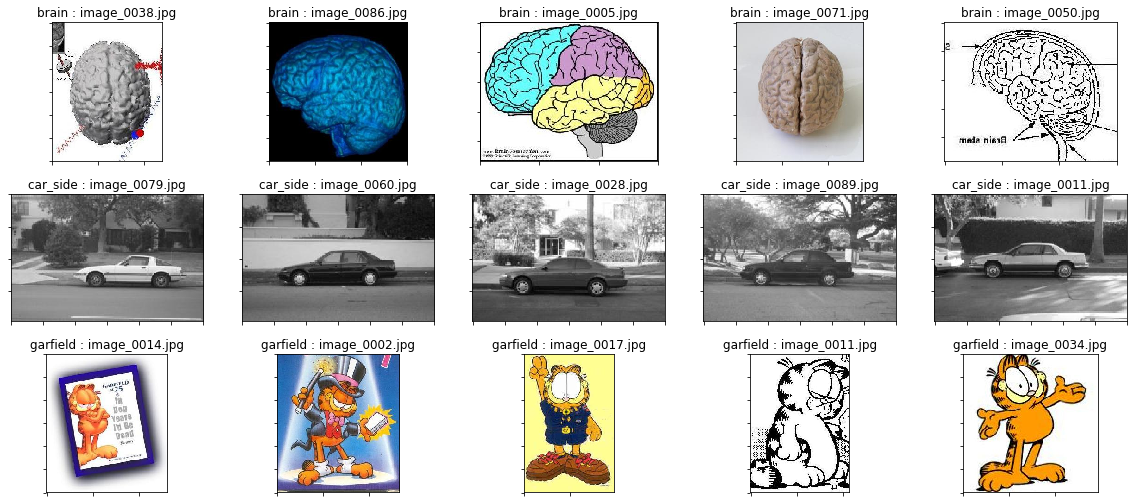

In [5]:
num_samples =5
cont =1
fig = plt.figure(figsize=(20,30))
for classes in ['brain', 'car_side','garfield' ]:
    perm = np.random.permutation(range(dic_imgs[classes].shape[0]))[0:num_samples]
    random_images_names = dic_imgs[classes][perm]
    for im_name in random_images_names:
        ax=fig.add_subplot(len(classes_names),num_samples,cont)
        path_image = path_classes+classes+'/'+im_name
        img = cv.cvtColor(cv.imread(path_image), cv.COLOR_BGR2RGB)
        plt.imshow(img, interpolation="nearest")
        ax.set_title((classes+" : " + im_name))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        cont +=1 

### But it is really complex problem !

##### <span style="color:red"> Labradoodle or fried chicken ? </span> 
<img src="../imgs/complex1.png" style="width:500px;heigth:100px">
##### <span style="color:red"> Puppy or bagel ? </span> 
<img src="../imgs/complex2.png" style="width:500px;heigth:100px">
##### <span style="color:red"> Sheepdog or mop ? </span> 
<img src="../imgs/complex3.png" style="width:500px;heigth:100px">
##### <span style="color:red"> Chihuahua or muffin ? </span> 
<img src="../imgs/complex4.png" style="width:500px;heigth:100px">
##### <span style="color:red"> Raw chicken or Donald Trump ? </span> 
<img src="../imgs/complex7.png" style="width:500px;heigth:100px">

We even can see on an **academic** dataset!...a **toy** dataset!

 -**Imagenet** the current challenge on image segmentation is about **1000** classes and more than one millon of image examples! [1](http://image-net.org/challenges/LSVRC/2017/index#comp)

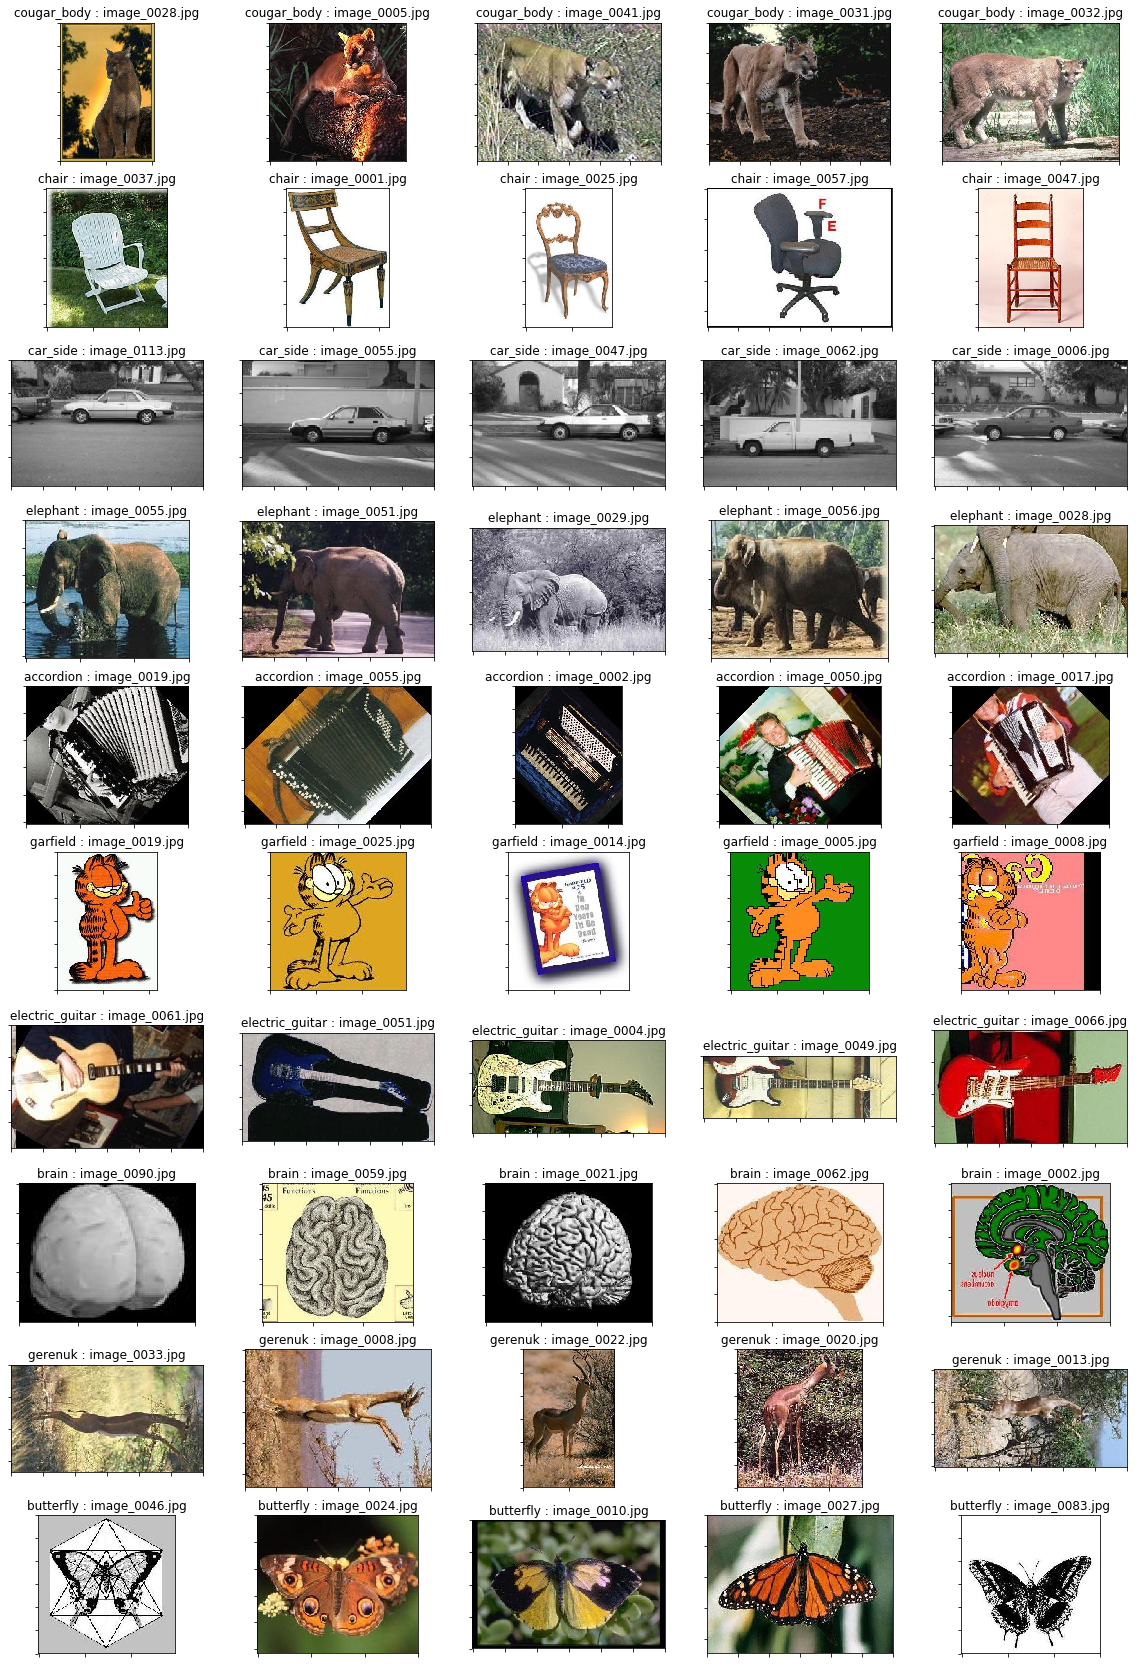

In [6]:
num_samples =5
cont =1
fig = plt.figure(figsize=(20,30))
for classes in classes_names:
    perm = np.random.permutation(range(dic_imgs[classes].shape[0]))[0:num_samples]
    random_images_names = dic_imgs[classes][perm]
    for im_name in random_images_names:
        ax=fig.add_subplot(len(classes_names),num_samples,cont)
        path_image = path_classes+classes+'/'+im_name
        img = cv.cvtColor(cv.imread(path_image), cv.COLOR_BGR2RGB)
        plt.imshow(img, interpolation="nearest")
        ax.set_title((classes+" : " + im_name))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        cont +=1 

#### Anyway go to the action and always try!

## <span style="color:red"> 2. Image similarity: Content-based image retrieval
 </span> 

Assume that you have a new image, but **you dont know** the corresponding label class. Then you will assign the class of the closer image in a dataset. 

The first step to compare images is measure the degree of **SIMILARITY** among them. 

- Images are numerical vectors, so we can measure difference among pixels using any metric. 
    - For instance the well know  **Euclidean metric**
    $$\left \| u -v \right \|_2 = \left (  \sum \left ( w_i\left | u_i -v_i \right |^{2} \right ) \right )^{\frac{1}{2}}$$

clase:  car_side  num ejemplo:  image_0111.jpg
(197, 300)


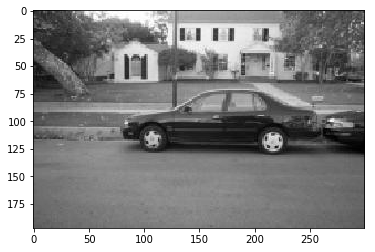

In [5]:
classes_three = ['brain', 'car_side','garfield' ]
print "clase: ", classes_three[1], " num ejemplo: ", dic_imgs[classes_three[1]][0]
im_name_sample = dic_imgs[classes_three[1]][0]
path_image = path_classes+classes_three[1]+'/'+im_name_sample
img_query = cv.imread(path_image,0)*1.
plt.imshow(img_query, interpolation="nearest",cmap='gray');
print img_query.shape

For first time we operate in grayscale and resize the image to perform comparisons ...

In [6]:
resize_value =100
q_resize = cv.resize(img_query, (resize_value, resize_value)) 
q_flatten = q_resize.reshape(resize_value*resize_value,1)
print "flatten and resized image: ", q_flatten.shape

flatten and resized image:  (10000, 1)


Now, we are display some example images to compare our **query image** and assign a class

- **Very important that images have same size w.r.t the QUERY**

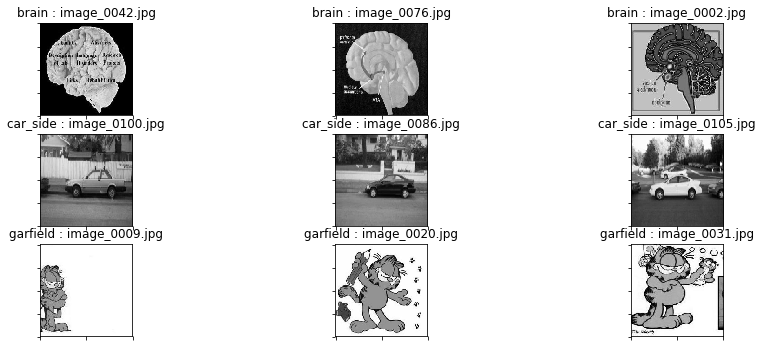

In [7]:
classes_three = ['brain', 'car_side','garfield' ]
num_samples =3
cont =1
dict_imgs = {}

fig = plt.figure(figsize=(15,20))
for classes in classes_three:
    perm = np.random.permutation(range(dic_imgs[classes].shape[0]))[0:num_samples]
    random_images_names = dic_imgs[classes][perm]
    for im_name in random_images_names:
        ax=fig.add_subplot(len(classes_names),num_samples,cont)
        path_image = path_classes+classes+'/'+im_name
        img = cv.resize(cv.imread(path_image,0), (100, 100))*1. 
        dict_imgs[(classes+"-"+im_name)] = img.reshape(resize_value*resize_value,1)
        plt.imshow(img, interpolation="nearest", cmap='gray')
        ax.set_title((classes+" : " + im_name))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        cont +=1 

Now we measure, using `scipy` we can define several distances. The basic one is the Euclidean distance

car_side-image_0086.jpg (10000, 1) distance:  6071.31229291
car_side-image_0100.jpg (10000, 1) distance:  6387.76742418
garfield-image_0009.jpg (10000, 1) distance:  13551.1111836
garfield-image_0031.jpg (10000, 1) distance:  12098.7237671
brain-image_0042.jpg (10000, 1) distance:  9724.38590266
garfield-image_0020.jpg (10000, 1) distance:  12047.9497993
brain-image_0002.jpg (10000, 1) distance:  8537.66664873
car_side-image_0105.jpg (10000, 1) distance:  8509.35427371
brain-image_0076.jpg (10000, 1) distance:  8923.04102892


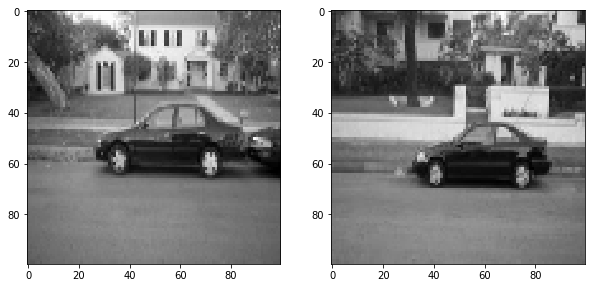

In [8]:
from scipy.spatial import distance

min_dst = 255*resize_value*resize_value
min_name= ""

for i in dict_imgs:
    print i, dict_imgs[i].shape, 
    dst = distance.euclidean(q_flatten, dict_imgs[i])
    print "distance: ", dst
    if dst <= min_dst:
        min_name= i
        min_dst =dst

plt.figure(figsize=(10,12))
plt.subplot(121), plt.imshow(q_flatten.reshape(resize_value,resize_value), 
                             interpolation="nearest", cmap='gray');
plt.subplot(122), plt.imshow(dict_imgs[min_name].reshape(resize_value,resize_value),
                             interpolation="nearest", cmap='gray');       

## <span style="color:orange"> Student Challenge </span>: 

- 1. Try with complete set of three classes. Which is the closest?

- 2. The results change with other metrics of **Similarity**?
    - Try with cosine distance [[2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine)]
    
    $$1 - \frac{u \cdot v}{\left \| u \right \|_2 \left \| v \right \|_2}$$
    
    - Try with correlation distance [[3](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.correlation.html#scipy.spatial.distance.correlation)]
    
    $$1 - \frac{(u - \mu_u ) \cdot (v -\mu_v)}{\left \| (u - \mu_u ) \right \|_2 \left \| (v -\mu_v) \right \|_2}
$$

## <span style="color:red"> 3. KNN simple classificaion </span> 

It is one of the simplest of classification algorithms available for supervised learning. The idea is to search for closest match of the test data in feature space. 

<img src="../imgs/classification_1.png" style="width:500px;heigth:100px">

### The main steps of the KNN algorithm

1. Calculate the distance between the new point and every other point
    - Sort the distances
2. Pick K minimum distances from the list of sorted distances
3. Use majority voting to get the color of the point

<img src="../imgs/classification_2.png" style="width:800px;heigth:100px">

#### Go to the actions!

Firstly  charge image of classes to be classified

In [9]:
X =[]
y =[]

for i, classes in enumerate(['brain', 'car_side','garfield' ]):
    print (i+1), "clase: ", classes, " y_value:",  (i+1), " total: ", len(dic_imgs[classes])    
    for im_name in dic_imgs[classes]:
        path_image = path_classes+classes+'/'+im_name        
        img = cv.resize(cv.imread(path_image,0), (100, 100))*1.
        flatt_img = img.reshape(resize_value*resize_value)
        X.append(flatt_img)
        #print len(X)
        y.append(i+1)

X = np.r_[X]        
y = np.r_[y]

1 clase:  brain  y_value: 1  total:  98
2 clase:  car_side  y_value: 2  total:  123
3 clase:  garfield  y_value: 3  total:  34


In [10]:
print X.shape
print y.shape

(255, 10000)
(255,)


In [11]:
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
print y_test

[1 1 1 3 1 1 2 2 2 3 3 2 1 1 2 3 2 2 1 1 2 3 2 1 1 2 2 3 1 2 2 1 1 3 2 1 1
 2 2 1 1 2 2 1 2 1 1 1 2 1 2]


In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=20)

neigh.fit(X_train, y_train)
print neigh.score(X_test, y_test)

0.901960784314


Very important to understand results!

In [13]:
from sklearn.metrics import confusion_matrix
predicciones_train = neigh.predict(X_train)
predicciones_test  = neigh.predict(X_test)

cm_train=confusion_matrix(y_train, predicciones_train)
cm_test = confusion_matrix(y_test, predicciones_test)
print cm_train
print "cm_test"
print cm_test


[[ 65  10   0]
 [  0 102   0]
 [ 14   5   8]]
cm_test
[[22  1  0]
 [ 0 21  0]
 [ 2  2  3]]


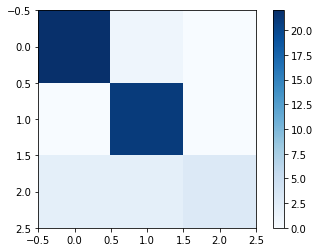

In [14]:
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

## <span style="color:orange"> Student Challenge </span>: 

- What about classify all classes?. Which is your score?
- What about classify videos?





# <span style="color:red"> From now we will dedicated to understand the problem on image and video classification at different levels! </span> 

# References

 [1 Image-net](http://image-net.org/challenges/LSVRC/2017/index#comp)
 
 [[2 Cosine distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine)]

[[3 Correlation distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.correlation.html#scipy.spatial.distance.correlation)]

<img src="../imgs/bannerThanks.jpg" style="width:1000px;">